<h1>Football Win Predictor</h1>

In [1]:
# import packages and set themes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.metrics import (confusion_matrix, classification_report)
from sklearn import (linear_model, metrics, neural_network, pipeline, model_selection, tree)
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
# reading csv's
dfp_2022  =  pd.read_csv('E2022.csv', skip_blank_lines=True)
dfp_2021  =  pd.read_csv('E2021.csv', skip_blank_lines=True)
dfp_2020  =  pd.read_csv('E2020.csv', skip_blank_lines=True)
dfp_2019  =  pd.read_csv('E2019.csv', skip_blank_lines=True)
dfc_2022  =  pd.read_csv('E1_c2022.csv', skip_blank_lines=True)
dfc_2021 =  pd.read_csv('E1_c2021.csv', skip_blank_lines=True)
dfc_2020 =  pd.read_csv('E1_c2020.csv', skip_blank_lines=True)
dfc_2019 =  pd.read_csv('E1_c2019.csv', skip_blank_lines=True)
dfl1_2022 =  pd.read_csv('E2_l12022.csv', skip_blank_lines=True)
dfl1_2021 =  pd.read_csv('E2_l12021.csv', skip_blank_lines=True)
dfl1_2020 =  pd.read_csv('E2_l12020.csv', skip_blank_lines=True)
dfl1_2019 =  pd.read_csv('E2_l12019.csv', skip_blank_lines=True)
dfl2_2022 =  pd.read_csv('E3_l22022.csv', skip_blank_lines=True)
dfl2_2021 =  pd.read_csv('E3_l22021.csv', skip_blank_lines=True)
dfl2_2020 =  pd.read_csv('E3_l22020.csv', skip_blank_lines=True)
dfl2_2019 =  pd.read_csv('E3_l22019.csv', skip_blank_lines=True)

### STEP 1: Clean the columns and rows which are N/A

For Premier and Champions league we removed the columns with N/A values as we checked there were over 106 columns and as we were not using all of them hence, removed a few of them here.

In [3]:
dfp_list = [dfp_2022 , dfp_2021, dfp_2020, dfp_2019]
dfp = pd.concat(dfp_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df

column_remove_list = dfp.columns[dfp.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfp_clean = remove_col(dfp,column_remove_list) 
print(column_remove_list)
dfp_clean

['B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'IWCH', 'IWCD', 'IWCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.91,2.08,1.76,0.50,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,3.00,1.47,2.73,1.75,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.81,2.10,1.76,0.50,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.96,1.96,1.87,-0.25,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.97,1.94,1.89,-1.00,1.99,1.93,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1421,E0,26/07/2020,16:00,Leicester,Man United,0,2,A,0,0,...,2.16,1.80,2.03,0.50,1.88,2.05,1.94,2.05,1.86,2.02
1422,E0,26/07/2020,16:00,Man City,Norwich,5,0,H,2,0,...,6.82,1.13,5.77,-3.75,2.01,1.88,2.06,1.88,2.02,1.84
1423,E0,26/07/2020,16:00,Newcastle,Liverpool,1,3,A,1,1,...,2.51,1.57,2.40,1.00,1.95,1.97,2.03,2.00,1.95,1.92
1424,E0,26/07/2020,16:00,Southampton,Sheffield United,3,1,H,0,1,...,2.11,1.82,2.01,-0.50,2.00,1.93,2.03,1.96,1.98,1.89


In [4]:
dfc_list = [dfc_2022 , dfc_2021, dfc_2020, dfc_2019]
dfc = pd.concat(dfc_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove the specified column list
    return df

column_remove_list = dfc.columns[dfc.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfc_clean = remove_col(dfc,column_remove_list) 
print(column_remove_list)
dfc_clean

['IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'BWCH', 'BWCD', 'BWCA', 'PSCH', 'PSCD', 'PSCA', 'PC>2.5', 'PC<2.5', 'PCAHH', 'PCAHA']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,B365CAHH,B365CAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E1,29/07/2022,20:00,Huddersfield,Burnley,0,1,A,0,1,...,1.70,2.28,1.63,0.00,2.09,1.81,2.14,1.83,2.09,1.78
1,E1,30/07/2022,15:00,Blackburn,QPR,1,0,H,1,0,...,1.96,1.94,1.86,-0.50,1.99,1.91,2.01,1.95,1.97,1.88
2,E1,30/07/2022,15:00,Blackpool,Reading,1,0,H,1,0,...,1.89,1.99,1.82,-0.50,2.08,1.82,2.11,1.86,2.04,1.82
3,E1,30/07/2022,15:00,Cardiff,Norwich,1,0,H,0,0,...,1.81,2.13,1.71,0.25,2.01,1.89,2.03,2.00,1.95,1.89
4,E1,30/07/2022,15:00,Hull,Bristol City,2,1,H,0,1,...,1.78,2.11,1.73,-0.25,2.10,1.70,2.17,1.81,2.09,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2174,E1,22/07/2020,19:30,Nott'm Forest,Stoke,1,4,A,0,1,...,1.81,2.06,1.76,-0.25,2.01,1.89,2.02,1.95,1.96,1.89
2175,E1,22/07/2020,19:30,Reading,Swansea,1,4,A,1,1,...,2.29,1.68,2.18,0.50,1.90,2.00,1.95,2.06,1.88,1.96
2176,E1,22/07/2020,19:30,Sheffield Weds,Middlesbrough,1,2,A,1,1,...,2.04,1.87,1.93,0.00,1.82,2.08,1.83,2.14,1.79,2.07
2177,E1,22/07/2020,19:30,West Brom,QPR,2,2,D,1,1,...,2.78,1.48,2.61,-1.75,1.93,1.97,1.95,2.00,1.92,1.94


For <b>League1 and League2</b>, as they're not well known hence, have a few matches with no betting odds.Therefore, we cleaned the data using row deletion as it there were a few rows which were not having any betting odds which would be used further in our visualisation and models

In [5]:
dfl1_list = [dfl1_2022 , dfl1_2021, dfl1_2020, dfl1_2019]
dfl1 = pd.concat(dfl1_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df

column_remove_list = dfl1.columns[dfl1.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfl1_clean = remove_col(dfl1,column_remove_list) 
print(column_remove_list)
# dfl1_clean

['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA']


In [6]:
dfl2_list = [dfl2_2022 , dfl2_2021, dfl2_2020, dfl2_2019]
dfl2 = pd.concat(dfl2_list,ignore_index = True)

def remove_col(df, col_list):
    
    df = df.dropna(axis=0,subset= col_list) #to remove the rows with null values for these columns
    return df

column_remove_list = dfl2.columns[dfl2.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
dfl2_clean = remove_col(dfl2,column_remove_list) 
print(column_remove_list)
# dfl2_clean

['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'MaxH', 'MaxD', 'MaxA', 'AvgH', 'AvgD', 'AvgA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'Max>2.5', 'Max<2.5', 'Avg>2.5', 'Avg<2.5', 'AHh', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'MaxAHH', 'MaxAHA', 'AvgAHH', 'AvgAHA', 'BWCH', 'BWCD', 'BWCA', 'IWCH', 'IWCD', 'IWCA', 'PSCH', 'PSCD', 'PSCA', 'WHCH', 'WHCD', 'WHCA', 'PC>2.5', 'PC<2.5', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA']


### STEP 2: Concatenating all the Leagues
Concatenating all leagues datasets and removing any additional unwanted columns from all the leagues.
Given is the column list which are removed as they will both not be used for our visualisation, model and are also corrupting our dataframe with null values 

In [7]:
df_list = [dfp_clean , dfc_clean, dfl1_clean, dfl2_clean]
df = pd.concat(df_list,ignore_index = True)
def remove_col(df, col_list):
    
    df = df.drop(columns = col_list, axis=1) #to remove div and time
    return df

column_remove_list = df.columns[df.isna().any()].tolist() #list of all unwanted columns whihc are either unused or conflicting
df_clean = remove_col(df,column_remove_list) 
print(column_remove_list)
df_clean

['IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'B365AHH', 'B365AHA', 'PAHH', 'PAHA', 'BWCH', 'BWCD', 'BWCA', 'PSCH', 'PSCD', 'PSCA', 'PCAHH', 'PCAHA', 'IWCH', 'IWCD', 'IWCA', 'B365CAHH', 'B365CAHA', 'B365>2.5', 'B365<2.5', 'P>2.5', 'P<2.5', 'PC>2.5', 'PC<2.5']


,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,B365C<2.5,MaxC>2.5,MaxC<2.5,AvgC>2.5,AvgC<2.5,AHCh,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,0,1,...,1.72,2.19,1.91,2.08,1.76,0.50,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,1,0,...,2.62,1.51,3.00,1.47,2.73,1.75,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,1,0,...,1.72,2.24,1.81,2.10,1.76,0.50,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,1,...,1.95,2.09,1.96,1.96,1.87,-0.25,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,0,0,...,1.96,2.06,1.97,1.94,1.89,-1.00,2.19,1.97,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,0,1,...,1.85,2.01,1.90,1.95,1.83,-0.50,2.01,1.95,1.96,1.86
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,1,0,...,1.75,2.11,1.83,2.03,1.76,-0.25,1.89,2.10,1.82,2.00
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,0,1,...,1.65,2.27,1.75,2.16,1.67,-0.50,1.95,2.02,1.88,1.94
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,1,0,...,1.75,2.10,1.83,2.03,1.76,0.25,1.85,2.12,1.78,2.06


### STEP 3: Making subsets of dataframe for betting odds, match stats and others

Most influential betting odds's subset

In [8]:
betodds_list = ['Div','Date','Time','HomeTeam','AwayTeam','FTHG','FTAG','FTR','B365H','B365D','B365A','AvgH','AvgD','AvgA']
betodds = df_clean.loc[:,betodds_list]
betodds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       7619 non-null   object 
 1   Date      7619 non-null   object 
 2   Time      7619 non-null   object 
 3   HomeTeam  7619 non-null   object 
 4   AwayTeam  7619 non-null   object 
 5   FTHG      7619 non-null   int64  
 6   FTAG      7619 non-null   int64  
 7   FTR       7619 non-null   object 
 8   B365H     7619 non-null   float64
 9   B365D     7619 non-null   float64
 10  B365A     7619 non-null   float64
 11  AvgH      7619 non-null   float64
 12  AvgD      7619 non-null   float64
 13  AvgA      7619 non-null   float64
dtypes: float64(6), int64(2), object(6)
memory usage: 833.5+ KB


All the available match stats's subset

In [9]:
# Creating a new column for goal difference and reindexing 
betodds["GD"] = betodds["FTHG"] - betodds["FTAG"]
new_columns = ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'GD',
       'B365H', 'B365D', 'B365A', 'AvgH', 'AvgD', 'AvgA']
betodds = betodds.reindex(columns = new_columns)
betodds

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,GD,B365H,B365D,B365A,AvgH,AvgD,AvgA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,-2,4.20,3.60,1.85,4.39,3.59,1.88
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,0,11.00,6.00,1.25,10.99,6.05,1.28
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,2,3.75,3.50,2.00,3.80,3.50,2.04
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,2.25,3.40,3.20,2.34,3.34,3.18
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,2,1.66,3.80,5.25,1.67,3.80,5.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,-1,1.90,3.60,3.90,1.93,3.47,3.84
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,2,2.00,3.30,4.00,1.99,3.42,3.69
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,-2,1.72,4.00,4.40,1.71,3.86,4.48
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,2,3.10,3.25,2.37,2.91,3.22,2.42


In [10]:
# Creating a column that gives us the prediction by the odds 
three_odds = betodds[["B365H", "B365D", "B365A"]]
new = three_odds.idxmin(axis = 1)
pd_new = pd.Series(data = new) 
three_odds["BetPred"] = pd_new
odds_three = three_odds["BetPred"]

In [11]:
# Creating a columns that gives us the average prediction 
average_odds = betodds[["AvgH", "AvgD", "AvgA"]]
new_1 = average_odds.idxmin(axis = 1)
pd_new = pd.Series(data = new_1) 
average_odds["AvgPred"] = pd_new
odds_average = average_odds["AvgPred"]

In [12]:
final = pd.merge(betodds, odds_three, left_index = True, right_index = True)
final_2 = pd.merge(final, odds_average, left_index = True, right_index = True)
final_2

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,GD,B365H,B365D,B365A,AvgH,AvgD,AvgA,BetPred,AvgPred
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,-2,4.20,3.60,1.85,4.39,3.59,1.88,B365A,AvgA
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,0,11.00,6.00,1.25,10.99,6.05,1.28,B365A,AvgA
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,2,3.75,3.50,2.00,3.80,3.50,2.04,B365A,AvgA
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,2.25,3.40,3.20,2.34,3.34,3.18,B365H,AvgH
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,2,1.66,3.80,5.25,1.67,3.80,5.57,B365H,AvgH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,-1,1.90,3.60,3.90,1.93,3.47,3.84,B365H,AvgH
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,2,2.00,3.30,4.00,1.99,3.42,3.69,B365H,AvgH
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,-2,1.72,4.00,4.40,1.71,3.86,4.48,B365H,AvgH
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,2,3.10,3.25,2.37,2.91,3.22,2.42,B365A,AvgA


In [13]:
final_2["BetPred"] = final_2["BetPred"].apply(lambda x: x.replace("B365", "").strip())
final_2["AvgPred"] = final_2["AvgPred"].apply(lambda x: x.replace("Avg", "").strip())
final_column = ['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'GD', 'B365H', 'B365D', 'B365A','BetPred', 'AvgH', 'AvgD', 'AvgA','AvgPred']
final_2 = final_2.reindex(columns = final_column)
betting_odds = final_2
betting_odds

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,GD,B365H,B365D,B365A,BetPred,AvgH,AvgD,AvgA,AvgPred
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,0,2,A,-2,4.20,3.60,1.85,A,4.39,3.59,1.88,A
1,E0,06/08/2022,12:30,Fulham,Liverpool,2,2,D,0,11.00,6.00,1.25,A,10.99,6.05,1.28,A
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,2,0,H,2,3.75,3.50,2.00,A,3.80,3.50,2.04,A
3,E0,06/08/2022,15:00,Leeds,Wolves,2,1,H,1,2.25,3.40,3.20,H,2.34,3.34,3.18,H
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,2,0,H,2,1.66,3.80,5.25,H,1.67,3.80,5.57,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,E3,07/03/2020,15:00,Northampton,Mansfield,1,2,A,-1,1.90,3.60,3.90,H,1.93,3.47,3.84,H
7615,E3,07/03/2020,15:00,Salford,Bradford,2,0,H,2,2.00,3.30,4.00,H,1.99,3.42,3.69,H
7616,E3,07/03/2020,15:00,Swindon,Forest Green,0,2,A,-2,1.72,4.00,4.40,H,1.71,3.86,4.48,H
7617,E3,07/03/2020,15:00,Walsall,Exeter,3,1,H,2,3.10,3.25,2.37,A,2.91,3.22,2.42,A


In [14]:
# Creating a confusion matrix to see how accurate odds are in itself 
results = betting_odds["FTR"] 
avg_pred = betting_odds["AvgPred"]
cf_matrix_1 = confusion_matrix(results, avg_pred)
pred_365 = betting_odds["BetPred"]
cf_matrix_2 = confusion_matrix(results, pred_365)



# print((results == avg_pred).value_counts())
# print(results.value_counts())
# print(avg_pred.value_counts())
# remove later 

<AxesSubplot:>

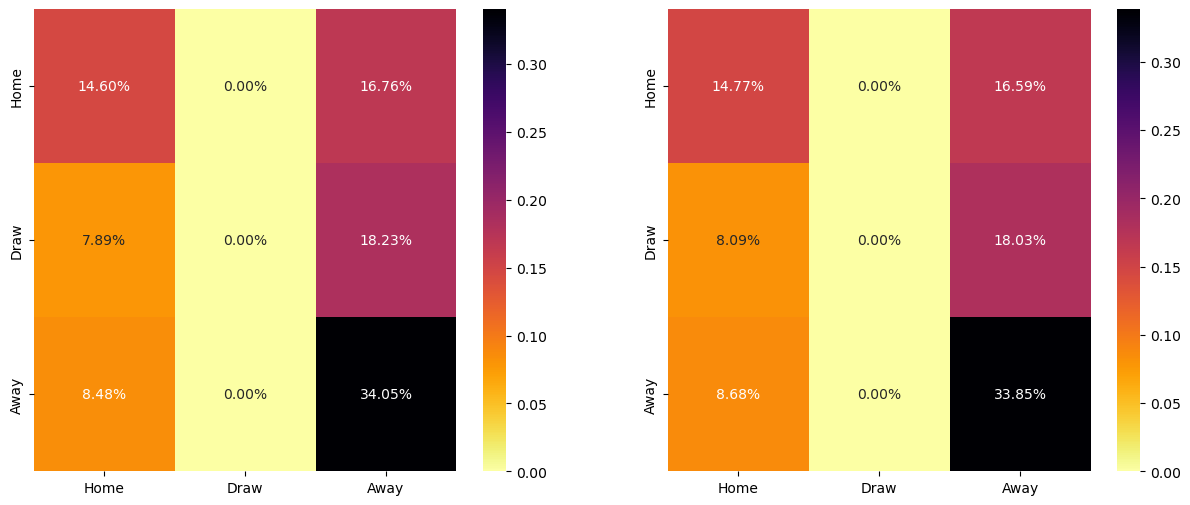

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.heatmap(cf_matrix_1/np.sum(cf_matrix_1), annot=True, fmt='.2%', cmap='inferno_r', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[1])

sns.heatmap(cf_matrix_2/np.sum(cf_matrix_2), annot=True, fmt='.2%', cmap='inferno_r', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[0])

We know that the sum of the confusion matrix represents the accuracy so we can see that directly using betting odds only allows us to predict around 48% of the odds correctly, which is more than just selecting at random but not high enough. lets see how much our prediction can go to if we were to train a model on this data. 


In [16]:
target_names = ["Home", "Draw", "Away"]
class_report_avg = classification_report(results, avg_pred, target_names=target_names, output_dict = True)
class_avg_df = pd.DataFrame(data = class_report_avg)

class_report_365 = classification_report(results, pred_365, target_names=target_names, output_dict = True)
class_365_df = pd.DataFrame(data = class_report_365)
class_avg_df.iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.468360,0.0,0.494345,0.486153
recall,0.470908,0.0,0.795988,0.486153
f1-score,0.469631,0.0,0.609909,0.486153
support,2389.000000,1990.0,3240.000000,0.486153


In [17]:
class_365_df.iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.471386,0.0,0.493156,0.486416
recall,0.465467,0.0,0.800617,0.486416
f1-score,0.468408,0.0,0.610353,0.486416
support,2389.000000,1990.0,3240.000000,0.486416


Now, we move on to training a model on the dataset. There are two approaches to this: we could use a classification or a regression model. Model can be used to predict the goal difference(goals scored by home team - goals scored by away team). So, positive goal difference represents that the home team won, 0 represents a draw and negative value represents that the away team one. 

since there's no real difference between the average odds and bet365 odds. we decide to just train the dataset on the average odds. 

We start by spliting the dataset. 

In [18]:
#Creating the X dataset 
betting_X = betting_odds[["AvgH", "AvgD", "AvgA"]]
betting_Y = betting_odds["GD"]
#Splitting the dataset into training and testing dataset
betting_X_train, betting_X_test, betting_y_train, betting_y_test = model_selection.train_test_split(betting_X, betting_Y, test_size=0.25, random_state = 123)

In [19]:
# Creating a linear regression model first 
match_pred_model = linear_model.LinearRegression()
match_pred_model.fit(betting_X_train, betting_y_train) 

#Predicting the results on our training dataset 
train_pred_lr = match_pred_model.predict(betting_X_train)

#Predicting the results on testing dataset 
test_pred_lr = match_pred_model.predict(betting_X_test)

In [20]:
#Creating a function that classifies the result from the actual goal difference values 
def goal_difference_result(x): 
    if x > 0: 
        out = "H"
    elif x == 0: 
        out = "D" 
    elif x < 0: 
        out = "A"
    return out 


goal_difference_actual = np.vectorize(goal_difference_result)
train_actual_results = pd.DataFrame(data = goal_difference_actual(betting_y_train))
print(train_actual_results.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5714 non-null   object
dtypes: object(1)
memory usage: 44.8+ KB
None


Since the predicted goal difference values are rarely exactly ever equal to 0, we decide to interpret any predicted goal 
difference between -0.5 and 0.5 as being a **Draw Prediction**. 

In [21]:
#Creating a function that classifies the result from the predicted goal difference values 
def goal_difference_result_2(x): 
    if x > 0.1: 
        out = "H"
    elif x < -0.1: 
        out = "A" 
    else: 
        out = "D"
    return out 

goal_difference_predicted = np.vectorize(goal_difference_result_2)
train_pred_results = pd.DataFrame(data = goal_difference_predicted(train_pred_lr)) 
train_pred_results.value_counts()

H    3637
A    1126
D     951
dtype: int64

In [22]:
# We now repeat the same thing on the testing dataset 
test_actual_results = pd.DataFrame(data = goal_difference_actual(betting_y_test))
test_pred_results = pd.DataFrame(data = goal_difference_predicted(test_pred_lr))

<AxesSubplot:>

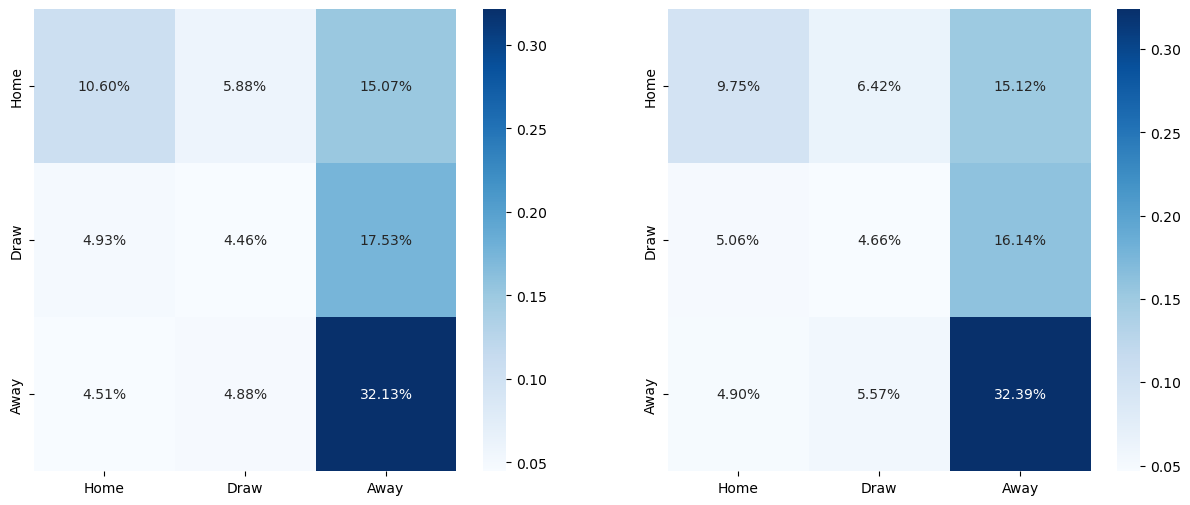

In [23]:
# Making a confusion matrix to visualise the results our simple model 
cf_matrix_3 = confusion_matrix(train_actual_results, train_pred_results)
cf_matrix_4 = confusion_matrix(test_actual_results, test_pred_results)

# Plotting the results 
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.heatmap(cf_matrix_3/np.sum(cf_matrix_3), annot=True, fmt='.2%', cmap='Blues', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[1])

sns.heatmap(cf_matrix_4/np.sum(cf_matrix_4), annot=True, fmt='.2%', cmap='Blues', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[0])

We see that the results of these were not even as good as the accuracy we could get by just looking at the odds directly, even though those odds rarely ever predicted draws. To give this another try, we use a decision tree model to predict the goal difference. 

In [24]:
class_report_lr_train = classification_report(train_actual_results, train_pred_results, target_names=target_names, output_dict = True)
report_lr_train_df = pd.DataFrame(data = class_report_lr_train)

class_report_lr_test = classification_report(test_actual_results, test_pred_results, target_names=target_names, output_dict = True)
report_lr_test_df = pd.DataFrame(data = class_report_lr_test)
report_lr_train_df.iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.494671,0.279706,0.508936,0.467973
recall,0.311521,0.180095,0.755819,0.467973
f1-score,0.382292,0.219110,0.608281,0.467973
support,1788.000000,1477.000000,2449.000000,0.467973


In [25]:
report_lr_test_df.iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.528796,0.293103,0.496350,0.471916
recall,0.336106,0.165692,0.773704,0.471916
f1-score,0.410987,0.211706,0.604743,0.471916
support,601.000000,513.000000,791.000000,0.471916


In [26]:
odds_fitted_tree = tree.DecisionTreeRegressor(max_depth=10).fit(betting_X_train,betting_y_train)
tree_predictions = odds_fitted_tree.predict(betting_X_train)
tree_train_pred_results = pd.DataFrame(data = goal_difference_predicted(tree_predictions)) 

#predicting the dataset on the testing dataset 
tree_test_predictions = odds_fitted_tree.predict(betting_X_test)
tree_test_pred_results = pd.DataFrame(data = goal_difference_predicted(tree_test_predictions)) 


<AxesSubplot:>

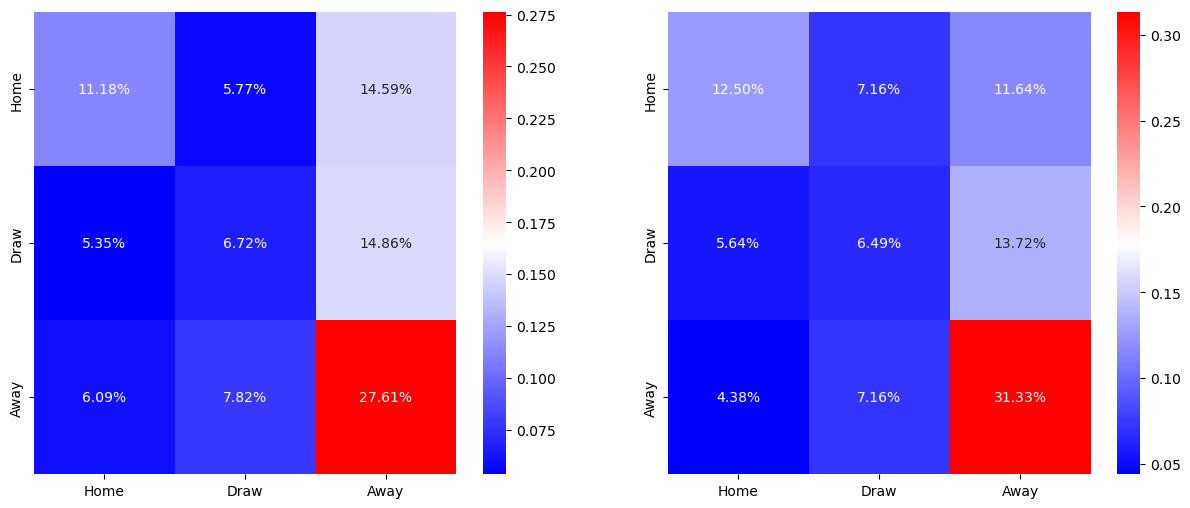

In [27]:
#Visualising the results of this model 
# Making a confusion matrix to visualise the results our simple model 
cf_matrix_5 = confusion_matrix(train_actual_results, tree_train_pred_results)
cf_matrix_6 = confusion_matrix(test_actual_results, tree_test_pred_results)

# Plotting the results 
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.heatmap(cf_matrix_5/np.sum(cf_matrix_5), annot=True, fmt='.2%', cmap='bwr', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[1])

sns.heatmap(cf_matrix_6/np.sum(cf_matrix_6), annot=True, fmt='.2%', cmap='bwr', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[0])

In [28]:
# We decide to test whether using a random forest would give us better results compared to random tree 

#Fitting a forest tree and predicting on the test dataset 
forest = RandomForestRegressor(n_estimators = 7, random_state = 123).fit(betting_X_train,betting_y_train)
forest_predictions = forest.predict(betting_X_train)
forest_train_pred_results = pd.DataFrame(data = goal_difference_predicted(forest_predictions)) 

#Using the forest model to predict on the training dataset 
forest_test_predictions = forest.predict(betting_X_test)
forest_test_pred_results = pd.DataFrame(data = goal_difference_predicted(forest_test_predictions)) 

<AxesSubplot:>

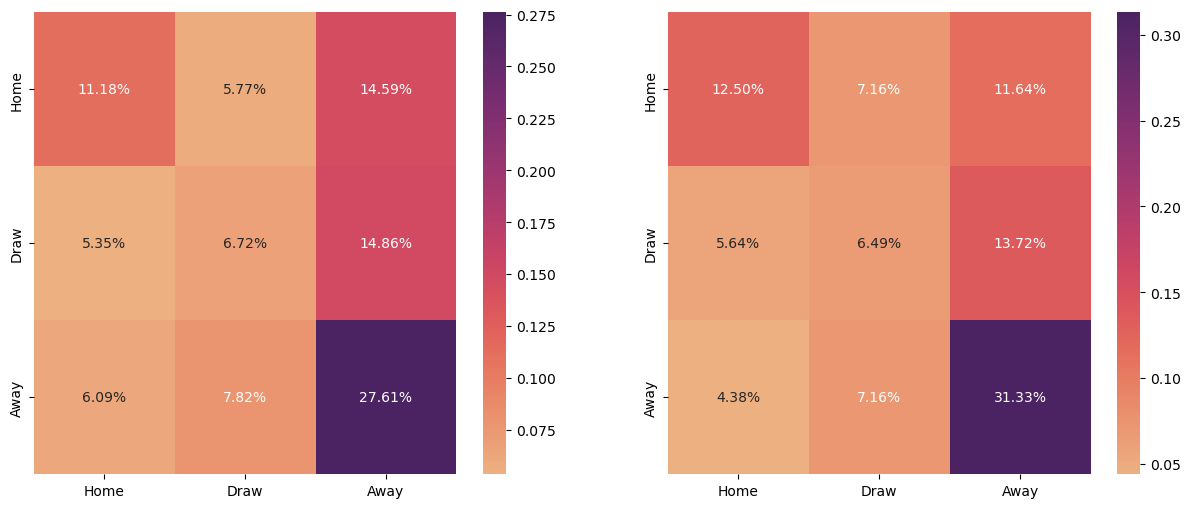

In [29]:
# Making a confusion matrix to visualise the results our simple model 
cf_matrix_7 = confusion_matrix(train_actual_results, tree_train_pred_results)
cf_matrix_8 = confusion_matrix(test_actual_results, tree_test_pred_results)

# Plotting the results 
fig, ax = plt.subplots(1, 2, figsize = (15, 6))
sns.heatmap(cf_matrix_7/np.sum(cf_matrix_7), annot=True, fmt='.2%', cmap='flare', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[1])

sns.heatmap(cf_matrix_8/np.sum(cf_matrix_8), annot=True, fmt='.2%', cmap='flare', xticklabels = ["Home", "Draw", "Away"], 
            yticklabels = ["Home", "Draw", "Away"], ax = ax[0])

While the confusion matrix does give us the most important stat about the accuracy, to learn more about our model, we calculate various statistics such as precision, recall, and F1 - score. 

In [30]:
class_report_forest_train = classification_report(train_actual_results, tree_train_pred_results, target_names=target_names, output_dict = True)
report_forest_train_df = pd.DataFrame(data = class_report_forest_train)
class_report_forest_test = classification_report(test_actual_results, tree_test_pred_results, target_names=target_names, output_dict = True)
report_forest_test_df = pd.DataFrame(data = class_report_forest_test)
report_forest_test_df.iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.494200,0.330749,0.483901,0.455118
recall,0.354409,0.249513,0.664981,0.455118
f1-score,0.412791,0.284444,0.560170,0.455118
support,601.000000,513.000000,791.000000,0.455118


## Interpret these results 
talk about what accuracy and recall

In [31]:
report_forest_train_df .iloc[:, 0:4]

,Home,Draw,Away,accuracy
precision,0.555210,0.312027,0.552640,0.50315
recall,0.399329,0.251185,0.730911,0.50315
f1-score,0.464541,0.278320,0.629395,0.50315
support,1788.000000,1477.000000,2449.000000,0.50315


## MOVE on to actual classification

As our problem of identifying a Home Win, Away Win and Draw is not a classic binary classification one. 

Hence, one of the strategies to do it is by using One Vs Rest Method where we'll breakdown this problem into three binary classification problems:

- Problem 1 : Home Win Vs [Draw, Away Win]
- Problem 2 : Draw Vs [Home Win, Away Win]
- Problem 3 : Away Win Vs [Home Win, Draw]

There can be drawbacks for this strategy if we had a large number of classes but as the number of classes is only 3 hence, this strategy can be much more effective than other strategies.

In [32]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC

# when x = avg betting winH, Draw and winA ; y is actual winH, winA or draw
oneVrest_y = betting_odds['FTR']
oneVrest_X_train, oneVrest_X_test, oneVrest_y_train, oneVrest_y_test = model_selection.train_test_split(betting_X, oneVrest_y, test_size=0.25, random_state = 123)
# Creating a SVC model based on OneVsRest Strategy
model = OneVsRestClassifier(SVC())
model.fit(oneVrest_X_train, oneVrest_y_train)

#Predicting the results on our training dataset 
train_pred_lr = model.predict(oneVrest_X_train)
class_report_oneVrest_train = classification_report(oneVrest_y_train, train_pred_lr,output_dict = True)
report_forest_train_df = pd.DataFrame(data = class_report_oneVrest_train)

#Predicting the results on testing dataset 
prediction = model.predict(oneVrest_X_test)
class_report_oneVrest_test = classification_report(oneVrest_y_test, prediction,output_dict = True)
report_forest_test_df = pd.DataFrame(data = class_report_oneVrest_test)
report_forest_test_df
df = pd.DataFrame(prediction)
print(oneVrest_y_test.value_counts())
df.value_counts()

H    791
A    601
D    513
Name: FTR, dtype: int64


H    1198
A     458
D     249
dtype: int64

create a heatmap for this using function 
then, using match stats make correlation then only create few scatter/ box plots on important factors

In [35]:
df_clean.columns.get_loc('AR')
df_matchstats = df_clean[df_clean.columns[5:df_clean.columns.get_loc('AR')+1]]
df_matchstats 

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,2,A,0,1,A,A Taylor,10,10,2,2,16,11,3,5,1,2,0,0
1,2,2,D,1,0,H,A Madley,9,11,3,4,7,9,4,4,2,0,0,0
2,2,0,H,1,0,H,P Bankes,7,15,3,2,18,16,5,5,3,3,0,0
3,2,1,H,1,1,D,R Jones,12,15,4,6,13,9,6,4,2,0,0,0
4,2,0,H,0,0,D,S Hooper,23,5,10,0,9,14,11,1,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7614,1,2,A,0,1,A,P Wright,18,14,6,7,16,15,7,2,5,1,1,0
7615,2,0,H,1,0,H,M Coy,13,11,3,2,9,9,3,4,1,0,0,0
7616,0,2,A,0,1,A,C Hicks,15,4,3,2,12,16,5,1,2,3,0,0
7617,3,1,H,1,0,H,T Nield,20,9,6,2,8,9,5,4,2,2,0,0


In [40]:
matchstats_Y = df_matchstats["FTR"]
matchstats_X = df_matchstats[["HS", "AS", "HST", "AST", "HF", "AF", "HC", "AC", "HY", "AY", "HR", "AR"]]
matchstats_X_train, matchstats_X_test, matchstats_y_train, matchstats_y_test = model_selection.train_test_split(matchstats_X, matchstats_Y, test_size=0.25, random_state = 123)

<AxesSubplot:>

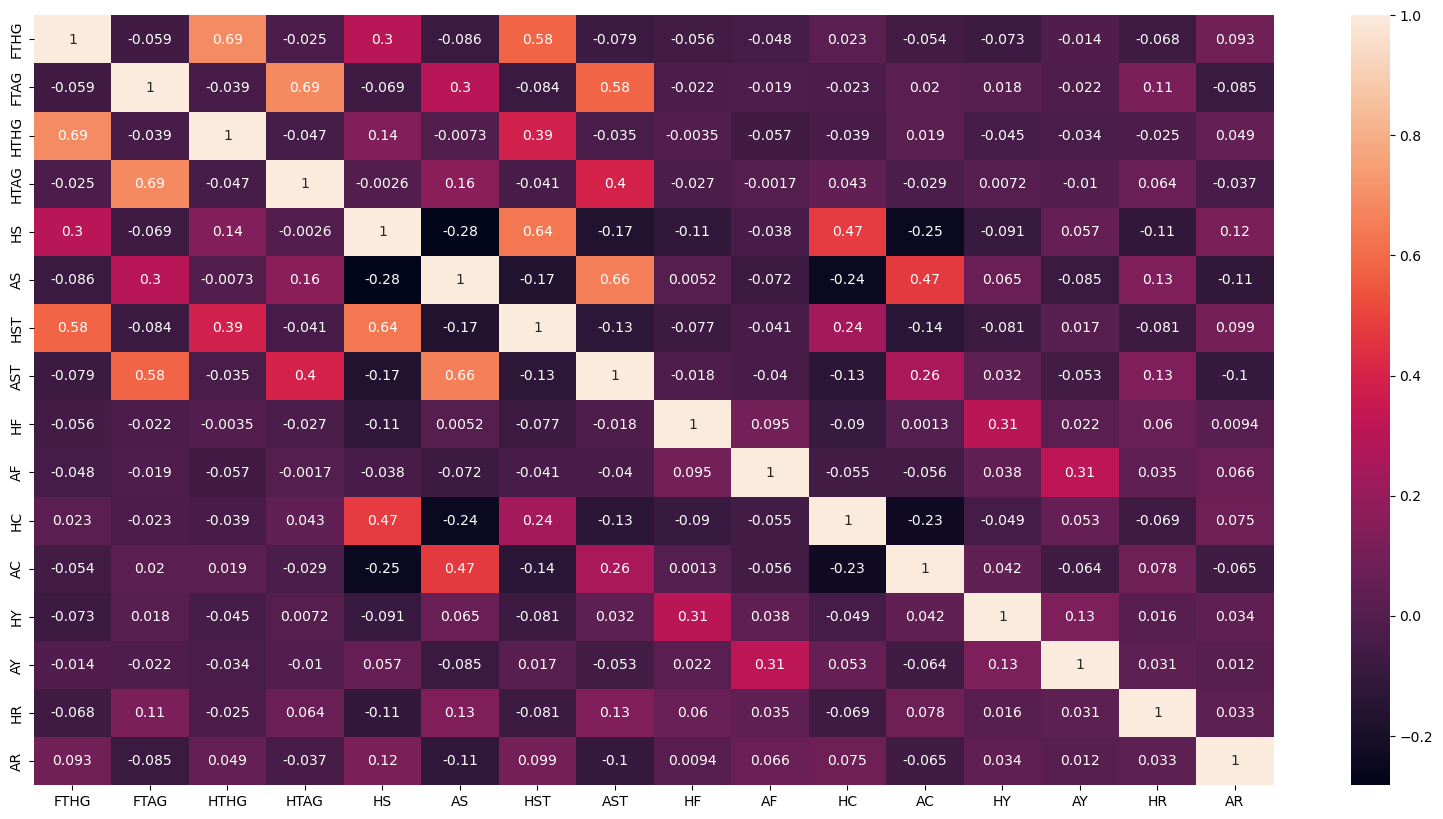

In [41]:
plt.figure(figsize=(20,10)) 
sns.heatmap(df_matchstats.corr(), annot= True)

In [49]:
classification_model = linear_model.LogisticRegression(multi_class = "multinomial", max_iter = 10000, solver = "lbfgs",
                                                       random_state = 123, fit_intercept = True)

In [50]:
classification_model.fit(matchstats_X_train, matchstats_y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial', random_state=123)

In [51]:
preditions = classification_model.predict(matchstats_X_test)

In [52]:
def classification_results_heatmap(model_name, testing_X_data, testing_Y_data): 
    predictions = model_name.predict(testing_X_data) 
    cf_matrix = confusion_matrix(testing_Y_data, predictions, labels = model_name.classes_)
    
    fig, ax = plt.subplots(1, 1, figsize = (15, 6))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='inferno_r', ax = ax, xticklabels = model_name.classes_,
               yticklabels = model_name.classes_) 

    print(fig)

Figure(1500x600)


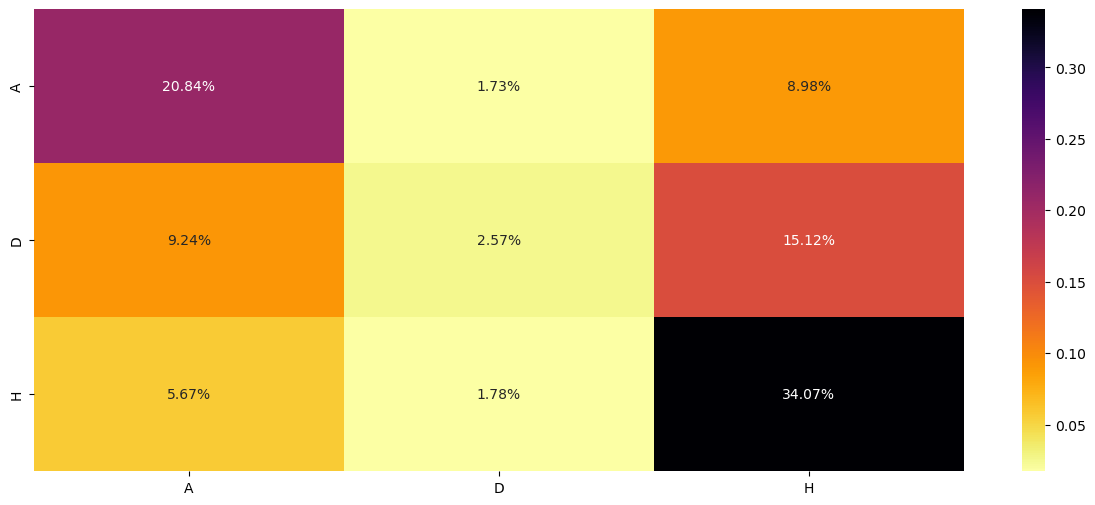

In [53]:
classification_results_heatmap(classification_model, matchstats_X_test, matchstats_y_test)